In [1]:
# %pip -q install transformers
# %pip -q install torch
# #Install library for tokenization of URLs
# %pip install url_parser
# %pip install chardet
#%pip install lightgbm
#%pip install wordcloud
#%pip install xgboost

In [2]:
import pandas as pd
import itertools
import hashlib
from hashlib import md5 as md5
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
from os import path as path
import tldextract
import seaborn as sns
# from wordcloud import WordCloud

In [3]:
# %pip install tldextract

In [4]:
mal=pd.read_csv('C:/ProgramData/anaconda3/malicious_phish.csv')

print(mal.shape)
mal.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
mal.sample(10)

,url,type
256127,https://twitter.com/share?text=%D0%A4%D0%BE%D1...,benign
397522,acepilots.com/usmc_aces2.html,benign
50314,jigsaw.com/id623408/1/laurentian_bank_of_canad...,benign
190128,http://www.steffen-lemme.de/component/k2/item/...,defacement
193019,http://www.radioroccella.net/index.php?option=...,defacement
62057,http://www.tmftabriz.com/index.php?view=articl...,defacement
556284,1kFbvYtsXW.agenciaperinetti.cl/.red/,benign
461227,pipl.com/directory/name/Mactavish,benign
326128,http://classics4life.com/index.php/guestbook?s...,defacement
399223,http://www.id-app7.co.uk/identify-customer=Ip5...,phishing


In [6]:
mal.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [7]:
#Select Partial data. Full data requires more than 12 hrs of Runtime which exceeds Kaggle's free user time limit
# mal = mal[:300000]

# Remove Duplicates if any in the dataset
mal = mal.drop_duplicates()

In [8]:
#%pip install url_parser
import re
from re import search as search
from url_parser import get_url
from urllib.parse import urlparse
import dill as pickle
# import chardet

In [9]:
#Extract Features from the dataset
from url_parser import get_url
from tld import get_tld
# import chardet

In [10]:
def abnormal_url(url):
    parse = urlparse(url).hostname
    hostname = str(parse)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
mal['abnormal_url'] = mal['url'].apply(lambda i: abnormal_url(i))

In [11]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',url)
    if match:
        return 1
    else:
        return 0
mal['sus_url'] = mal['url'].apply(lambda i: suspicious_words(i))

In [12]:
def extract_file_type(url):
    """
    This function extracts the file type from a url.
    """
    pathy = urlparse(url).path
    ext = os.path.splitext(pathy)[1]
    match = re.search('.bat|.dll|.pif|.exe|.scr|.application|.msp', ext)
    if match:
        return 1
    else:
        return 0
mal['file'] = mal['url'].apply(lambda i: extract_file_type(i))


# Example usage:
# url = "http://www.example.com/path/to/file.txt"
# file_type = extract_file_type(url)
# print(f"The file type of {url} is {file_type}.")

In [13]:
def count_https(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    elif match=='http':
        return 0
    else:
        return -1
mal['count_https'] = mal['url'].apply(lambda i: count_https(i))

In [14]:
# def count_https(url):
#     return url.count('https')
# mal['count_https'] = mal['url'].apply(lambda i : count_https(i))

# def count_http(url):
#     return url.count('http')

# mal['count-http'] = mal['url'].apply(lambda i : count_http(i))

In [15]:
#Extract www
def count_www(url):
        return url.count('www')
mal['count-www'] = mal['url'].apply(lambda i: count_www(i))

In [16]:
#URL Length
def url_length(url):
    return len(str(url))
mal['url_length'] = mal['url'].apply(lambda i: url_length(i))


In [17]:
# def extract_pri_domain(url):
#     try:
#         res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
#         pri_domain= res.parsed_url.netloc
#     except :
#         pri_domain= None
#     return pri_domain
# mal['pri_domain'] = mal['url'].apply(lambda x: extract_pri_domain(x))


In [18]:
#Hostname Length
def hostname_length(url):
    return len(urlparse(url).netloc)

mal['hostname_length'] = mal['url'].apply(lambda i: hostname_length(i))

In [19]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

mal['fd_length'] = mal['url'].apply(lambda i: fd_length(i))

In [20]:
#%pip install tld

In [21]:
#Length of Top Level Domain
# mal['tld'] = mal['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(url):
    tld = get_tld(url,fail_silently=True)
    try:
        return len(tld)
    except:
        return -1

mal['tld_length'] = mal['url'].apply(lambda i: tld_length(i))

# def tld_alpha(url):
#     try:
#         parsed_url = urlparse(url)
#         # Extract components of the url
#         extracted_url = tldextract.extract(url)
#         # Get the domain part
#         domain = extracted_url.domain
#         return sum(c.isalpha() for c in domain)
#     except:
#         return -1

# mal['tld_alpha'] = mal['url'].apply(lambda i: tld_alpha(i))

In [22]:
# mal.drop(['tld'],axis=1,inplace=True)

In [23]:
# mal['domain']= ''
# def process_tld(url):
#         res = get_tld(url, fail_silently=True)
#         pri_domain= res.urlparse(url).netloc
#         return pri_domain
# mal['domain'] = mal['url'].apply(lambda i: process_tld(i))

def extract_tld(url):
    """
    This function extracts the top-level domain from a url.
    """
    ext = tldextract.extract(url)
    extracted = ext.suffix
    hash_object = hashlib.md5(extracted.encode())
    return int(hash_object.hexdigest(), 16) % (10 ** 8)
mal['domain'] = mal['url'].apply(lambda i: extract_tld(i))

mal.sample(30)

,url,type,abnormal_url,sus_url,file,count_https,count-www,url_length,hostname_length,fd_length,tld_length,domain
422357,en.wikipedia.org/wiki/Casey_Stengel,benign,0,0,0,-1,0,35,0,4,-1,26125624
461396,imdb.com/name/nm0688460/bio,benign,0,0,0,-1,0,27,0,4,-1,54754640
536866,http://51.158.28.129/orbitclient.arm6,malware,1,0,0,0,0,37,13,16,-1,99178366
386188,http://www.uniaoparaobem.com.br/index.php?opti...,defacement,1,0,0,0,1,69,24,9,6,44138238
168169,fightworld.tv/en/news/canada-news/item/steve-b...,benign,0,0,0,-1,0,90,0,2,-1,55644083
517920,http://djsipke.nl/foto-album/5-druiprock-2010/...,defacement,1,0,0,0,0,85,10,10,2,64603208
482942,https://archive.org/search.php?query=mediatype...,benign,1,0,0,1,0,96,11,10,3,26125624
496347,wiki.answers.com/Q/Who_is_Richie_Rich,benign,0,0,0,-1,0,37,0,1,-1,54754640
352407,ca.linkedin.com/in/robertgravel,benign,0,0,0,-1,0,31,0,2,-1,54754640
441407,abcnews.go.com/Politics/2010_Elections/Illinois,benign,0,0,0,-1,0,47,0,8,-1,54754640


In [24]:
#Extract Alphabet Numerics
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
mal['count-letters']= mal['url'].apply(lambda i: letter_count(i))

In [25]:
# #Extract Fragment
# mal['fragment'] = ""
# def find_fragment(x):
#     try:
#         n= get_url(x).fragment
#         if(n!=None):
#             return 1
#         else:
#             return 0
#     except:
#         pass
# mal['fragment'] = mal['url'].apply(lambda x: find_fragment(x))

In [26]:
mal['count_question'] = ""
def count_questionmark(url):
    return url.count('?')
mal['count_question']= mal['url'].apply(lambda i: i.count('?'))

In [27]:
#Extract Query
# mal['query'] = ""
# def find_query(url):
#     try:
#         parsed = get_url(url)
#         return len(parsed.query)
#         # return url.count('?')
#     except:
#         pass
# mal['query'] = mal['url'].apply(lambda x: find_query(x))

In [28]:
#Extract shorturl
# import googlesearch
# from googlesearch import search


mal['short_url'] = ""
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
mal['short_url'] = mal['url'].apply(lambda i: shortening_service(i))

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
C:\Users\AMARA NYANZI\AppData\Local\Temp\ipykernel_28160\2599959318.py:8: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly

In [29]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

mal['count_embed_domian'] = mal['url'].apply(lambda i: no_of_embed(i))

In [30]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
mal['use_of_ip'] = mal['url'].apply(lambda i: having_ip_address(i))

In [31]:
#Count Occurance of / in path
mal['count/'] = 0
def count_forwardslash(x):
        return x.count('/')
mal['count/'] = mal['url'].apply(lambda x: count_forwardslash(x))

In [32]:
#Count occurance of % in URL
mal['count%'] = ''
def count_percent(x):
    try:
        return x.count('%')
    except:
        return 0
mal['count%'] = mal['url'].apply(lambda x: count_percent(x))

In [33]:
#Count occurance of = in URL
mal['count='] = ''
def count_equals(x):
    try:
        return x.count('=')
    except:
        return 0
mal['count='] = mal['url'].apply(lambda x: count_equals(x))

In [34]:
#Count occurance of - in URL
mal['count-'] = ''
def count_hyphen(x):
    try:
        return x.count('-')
    except:
        return 0
mal['count-'] = mal['url'].apply(lambda x: count_hyphen(x))

In [35]:
#Count occurance of @ in URL. It may also signify the presence of a email address in the URL
mal['count@'] = ''
def count_attherate(x):
    try:
        return x.count('@')
    except:
        return 0
mal['count@'] = mal['url'].apply(lambda x: count_attherate(x))

In [36]:
mal['count_non_alphanumeric'] = ''
def count_non_alphanumeric(url):    
    return sum(not c.isalnum() for c in url)
mal['count_non_alphanumeric'] = mal['url'].apply(lambda i: count_non_alphanumeric(i))

In [37]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
mal['digits']= mal['url'].apply(lambda i: digit_count(i))

In [38]:
# def get_url_region(primary_domain):
#     ccTLD_to_region = {
#     ".ac": "Ascension Island",
#     ".ad": "Andorra",
#     ".ae": "United Arab Emirates",
#     ".af": "Afghanistan",
#     ".ag": "Antigua and Barbuda",
#     ".ai": "Anguilla",
#     ".al": "Albania",
#     ".am": "Armenia",
#     ".an": "Netherlands Antilles",
#     ".ao": "Angola",
#     ".aq": "Antarctica",
#     ".ar": "Argentina",
#     ".as": "American Samoa",
#     ".at": "Austria",
#     ".au": "Australia",
#     ".aw": "Aruba",
#     ".ax": "Åland Islands",
#     ".az": "Azerbaijan",
#     ".ba": "Bosnia and Herzegovina",
#     ".bb": "Barbados",
#     ".bd": "Bangladesh",
#     ".be": "Belgium",
#     ".bf": "Burkina Faso",
#     ".bg": "Bulgaria",
#     ".bh": "Bahrain",
#     ".bi": "Burundi",
#     ".bj": "Benin",
#     ".bm": "Bermuda",
#     ".bn": "Brunei Darussalam",
#     ".bo": "Bolivia",
#     ".br": "Brazil",
#     ".bs": "Bahamas",
#     ".bt": "Bhutan",
#     ".bv": "Bouvet Island",
#     ".bw": "Botswana",
#     ".by": "Belarus",
#     ".bz": "Belize",
#     ".ca": "Canada",
#     ".cc": "Cocos Islands",
#     ".cd": "Democratic Republic of the Congo",
#     ".cf": "Central African Republic",
#     ".cg": "Republic of the Congo",
#     ".ch": "Switzerland",
#     ".ci": "Côte d'Ivoire",
#     ".ck": "Cook Islands",
#     ".cl": "Chile",
#     ".cm": "Cameroon",
#     ".cn": "China",
#     ".co": "Colombia",
#     ".cr": "Costa Rica",
#     ".cu": "Cuba",
#     ".cv": "Cape Verde",
#     ".cw": "Curaçao",
#     ".cx": "Christmas Island",
#     ".cy": "Cyprus",
#     ".cz": "Czech Republic",
#     ".de": "Germany",
#     ".dj": "Djibouti",
#     ".dk": "Denmark",
#     ".dm": "Dominica",
#     ".do": "Dominican Republic",
#     ".dz": "Algeria",
#     ".ec": "Ecuador",
#     ".ee": "Estonia",
#     ".eg": "Egypt",
#     ".er": "Eritrea",
#     ".es": "Spain",
#     ".et": "Ethiopia",
#     ".eu": "European Union",
#     ".fi": "Finland",
#     ".fj": "Fiji",
#     ".fk": "Falkland Islands",
#     ".fm": "Federated States of Micronesia",
#     ".fo": "Faroe Islands",
#     ".fr": "France",
#     ".ga": "Gabon",
#     ".gb": "United Kingdom",
#     ".gd": "Grenada",
#     ".ge": "Georgia",
#     ".gf": "French Guiana",
#     ".gg": "Guernsey",
#     ".gh": "Ghana",
#     ".gi": "Gibraltar",
#     ".gl": "Greenland",
#     ".gm": "Gambia",
#     ".gn": "Guinea",
#     ".gp": "Guadeloupe",
#     ".gq": "Equatorial Guinea",
#     ".gr": "Greece",
#     ".gs": "South Georgia and the South Sandwich Islands",
#     ".gt": "Guatemala",
#     ".gu": "Guam",
#     ".gw": "Guinea-Bissau",
#     ".gy": "Guyana",
#     ".hk": "Hong Kong",
#     ".hm": "Heard Island and McDonald Islands",
#     ".hn": "Honduras",
#     ".hr": "Croatia",
#     ".ht": "Haiti",
#     ".hu": "Hungary",
#     ".id": "Indonesia",
#     ".ie": "Ireland",
#     ".il": "Israel",
#     ".im": "Isle of Man",
#     ".in": "India",
#     ".io": "British Indian Ocean Territory",
#     ".iq": "Iraq",
#     ".ir": "Iran",
#     ".is": "Iceland",
#     ".it": "Italy",
#     ".je": "Jersey",
#     ".jm": "Jamaica",
#     ".jo": "Jordan",
#     ".jp": "Japan",
#     ".ke": "Kenya",
#     ".kg": "Kyrgyzstan",
#     ".kh": "Cambodia",
#     ".ki": "Kiribati",
#     ".km": "Comoros",
#     ".kn": "Saint Kitts and Nevis",
#     ".kp": "Democratic People's Republic of Korea (North Korea)",
#     ".kr": "Republic of Korea (South Korea)",
#     ".kw": "Kuwait",
#     ".ky": "Cayman Islands",
#     ".kz": "Kazakhstan",
#     ".la": "Laos",
#     ".lb": "Lebanon",
#     ".lc": "Saint Lucia",
#     ".li": "Liechtenstein",
#     ".lk": "Sri Lanka",
#     ".lr": "Liberia",
#     ".ls": "Lesotho",
#     ".lt": "Lithuania",
#     ".lu": "Luxembourg",
#     ".lv": "Latvia",
#     ".ly": "Libya",
#     ".ma": "Morocco",
#     ".mc": "Monaco",
#     ".md": "Moldova",
#     ".me": "Montenegro",
#     ".mf": "Saint Martin (French part)",
#     ".mg": "Madagascar",
#     ".mh": "Marshall Islands",
#     ".mk": "North Macedonia",
#     ".ml": "Mali",
#     ".mm": "Myanmar",
#     ".mn": "Mongolia",
#     ".mo": "Macao",
#     ".mp": "Northern Mariana Islands",
#     ".mq": "Martinique",
#     ".mr": "Mauritania",
#     ".ms": "Montserrat",
#     ".mt": "Malta",
#     ".mu": "Mauritius",
#     ".mv": "Maldives",
#     ".mw": "Malawi",
#     ".mx": "Mexico",
#     ".my": "Malaysia",
#     ".mz": "Mozambique",
#     ".na": "Namibia",
#     ".nc": "New Caledonia",
#     ".ne": "Niger",
#     ".nf": "Norfolk Island",
#     ".ng": "Nigeria",
#     ".ni": "Nicaragua",
#     ".nl": "Netherlands",
#     ".no": "Norway",
#     ".np": "Nepal",
#     ".nr": "Nauru",
#     ".nu": "Niue",
#     ".nz": "New Zealand",
#     ".om": "Oman",
#     ".pa": "Panama",
#     ".pe": "Peru",
#     ".pf": "French Polynesia",
#     ".pg": "Papua New Guinea",
#     ".ph": "Philippines",
#     ".pk": "Pakistan",
#     ".pl": "Poland",
#     ".pm": "Saint Pierre and Miquelon",
#     ".pn": "Pitcairn",
#     ".pr": "Puerto Rico",
#     ".ps": "Palestinian Territory",
#     ".pt": "Portugal",
#     ".pw": "Palau",
#     ".py": "Paraguay",
#     ".qa": "Qatar",
#     ".re": "Réunion",
#     ".ro": "Romania",
#     ".rs": "Serbia",
#     ".ru": "Russia",
#     ".rw": "Rwanda",
#     ".sa": "Saudi Arabia",
#     ".sb": "Solomon Islands",
#     ".sc": "Seychelles",
#     ".sd": "Sudan",
#     ".se": "Sweden",
#     ".sg": "Singapore",
#     ".sh": "Saint Helena",
#     ".si": "Slovenia",
#     ".sj": "Svalbard and Jan Mayen",
#     ".sk": "Slovakia",
#     ".sl": "Sierra Leone",
#     ".sm": "San Marino",
#     ".sn": "Senegal",
#     ".so": "Somalia",
#     ".sr": "Suriname",
#     ".ss": "South Sudan",
#     ".st": "São Tomé and Príncipe",
#     ".sv": "El Salvador",
#     ".sx": "Sint Maarten (Dutch part)",
#     ".sy": "Syria",
#     ".sz": "Eswatini",
#     ".tc": "Turks and Caicos Islands",
#     ".td": "Chad",
#     ".tf": "French Southern Territories",
#     ".tg": "Togo",
#     ".th": "Thailand",
#     ".tj": "Tajikistan",
#     ".tk": "Tokelau",
#     ".tl": "Timor-Leste",
#     ".tm": "Turkmenistan",
#     ".tn": "Tunisia",
#     ".to": "Tonga",
#     ".tr": "Turkey",
#     ".tt": "Trinidad and Tobago",
#     ".tv": "Tuvalu",
#     ".tw": "Taiwan",
#     ".tz": "Tanzania",
#     ".ua": "Ukraine",
#     ".ug": "Uganda",
#     ".uk": "United Kingdom",
#     ".us": "United States",
#     ".uy": "Uruguay",
#     ".uz": "Uzbekistan",
#     ".va": "Vatican City",
#     ".vc": "Saint Vincent and the Grenadines",
#     ".ve": "Venezuela",
#     ".vg": "British Virgin Islands",
#     ".vi": "U.S. Virgin Islands",
#     ".vn": "Vietnam",
#     ".vu": "Vanuatu",
#     ".wf": "Wallis and Futuna",
#     ".ws": "Samoa",
#     ".ye": "Yemen",
#     ".yt": "Mayotte",
#     ".za": "South Africa",
#     ".zm": "Zambia",
#     ".zw": "Zimbabwe"
#     }
    
#     for ccTLD in ccTLD_to_region:
#         if primary_domain.endswith(ccTLD):
#             return ccTLD_to_region[ccTLD]
    
#     return "Global"
# urls_data['url_region'] = urls_data['pri_domain'].apply(lambda x: get_url_region(str(x)))

In [39]:
mal.columns

Index(['url', 'type', 'abnormal_url', 'sus_url', 'file', 'count_https',
       'count-www', 'url_length', 'hostname_length', 'fd_length', 'tld_length',
       'domain', 'count-letters', 'count_question', 'short_url',
       'count_embed_domian', 'use_of_ip', 'count/', 'count%', 'count=',
       'count-', 'count@', 'count_non_alphanumeric', 'digits'],
      dtype='object')

In [40]:
# def hash_encode(category):
#     hash_object = hashlib.md5(category.encode())
#     return int(hash_object.hexdigest(), 16) % (10 ** 8)

In [41]:
def extract_root_domain(url):
        
        # extracted = tldextract.extract(url)
        parsed_url = urlparse(url)
        domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_url)
        # root_domain = '.'.join(part for part in extracted[1:] if part)
        hash_object = hashlib.md5(domain.encode())
        return int(hash_object.hexdigest(), 16) % (10 ** 8)
mal['root_domain'] = mal['url'].apply(lambda x: extract_root_domain((x)))

In [42]:
#mal.drop(['pri_domain'],axis=1,inplace=True)
#mal = mal[mal['root_domain'] != '0']
#mal['root_domain'].value_counts()

In [43]:
#mal['root_domain'] = mal['root_domain'].apply(hash_encode)
# mal.info()

In [44]:
mal["type"].value_counts()


type
benign        428080
defacement     95308
phishing       94092
malware        23645
Name: count, dtype: int64

In [45]:
#mal.drop(['sub_domain'],axis=1,inplace=True)
#mal.drop(['tld'],axis=1,inplace=True)
#mal.drop(['protocol'],axis=1,inplace=True)
# print(mal.iloc[2])


In [46]:
mal.info()
mal.describe()
mal

<class 'pandas.core.frame.DataFrame'>
Index: 641125 entries, 0 to 651190
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   url                     641125 non-null  object
 1   type                    641125 non-null  object
 2   abnormal_url            641125 non-null  int64 
 3   sus_url                 641125 non-null  int64 
 4   file                    641125 non-null  int64 
 5   count_https             641125 non-null  int64 
 6   count-www               641125 non-null  int64 
 7   url_length              641125 non-null  int64 
 8   hostname_length         641125 non-null  int64 
 9   fd_length               641125 non-null  int64 
 10  tld_length              641125 non-null  int64 
 11  domain                  641125 non-null  int64 
 12  count-letters           641125 non-null  int64 
 13  count_question          641125 non-null  int64 
 14  short_url               641125 non-null  

,url,type,abnormal_url,sus_url,file,count_https,count-www,url_length,hostname_length,fd_length,...,count_embed_domian,use_of_ip,count/,count%,count=,count-,count@,count_non_alphanumeric,digits,root_domain
0,br-icloud.com.br,phishing,0,0,0,-1,0,16,0,0,...,0,0,0,0,0,1,0,3,0,17923596
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,-1,0,35,0,5,...,0,0,2,0,0,0,0,5,1,17923596
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,-1,0,31,0,7,...,0,0,3,0,0,0,0,5,1,17923596
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,0,0,1,88,21,9,...,0,0,3,0,4,1,0,18,7,26811531
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,0,0,0,235,23,9,...,0,0,3,0,3,1,0,14,22,93290493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,0,-1,0,39,0,7,...,0,0,3,0,0,0,0,6,12,17923596
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,0,-1,0,44,0,8,...,0,0,4,0,0,2,0,8,7,17923596
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,0,-1,1,42,0,7,...,0,0,4,0,0,0,0,6,3,17923596
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,0,-1,0,45,0,4,...,0,0,2,0,0,0,0,9,0,17923596


In [47]:
# #Data Type Conversions for suitable processing into ML pipeline
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# mal['type'] = label_encoder.fit_transform(mal['type'])
# mal["type"].value_counts()
# # mal['protocol'] = label_encoder.fit_transform(mal['protocol'])
# # mal['sub_domain'] = label_encoder.fit_transform(mal['sub_domain'])
# # mal['domain'] = label_encoder.fit_transform(mal['domain'])
# # mal['top_domain'] = label_encoder.fit_transform(mal['top_domain'])
# # mal['www'] = label_encoder.fit_transform(mal['www'])
# # mal['dir'] = label_encoder.fit_transform(mal['dir'])
# # mal['file'] = label_encoder.fit_transform(mal['file'])
# # mal['path'] = label_encoder.fit_transform(mal['path'])
# # mal['fragment'] = label_encoder.fit_transform(mal['fragment'])
# # mal['short_url'] = label_encoder.fit_transform(mal['short_url'])
# # mal['use_of_ip'] = label_encoder.fit_transform(mal['use_of_ip'])
# # mal['count/'] = mal['count/'].astype('int64')
# # mal['count%'] = mal['count%'].astype('int64')
# # mal['count='] = mal['count='].astype('int64')
# # mal['count-'] = mal['count-'].astype('int64')
# # mal['count@'] = mal['count@'].astype('int64')
# # mal['www'] = mal['www'].astype('int64')
# mal.info()
# mal.describe()
# mal

In [48]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
mal["type_code"] = lb_make.fit_transform(mal["type"])
mal["type_code"].value_counts()

type_code
0    428080
1     95308
3     94092
2     23645
Name: count, dtype: int64

In [49]:
x = mal[[ 'abnormal_url', 'sus_url','digits','count_question','count_non_alphanumeric', 
         'count_https', 'count-www','url_length','hostname_length',
         'fd_length', 'count-letters', 'short_url', 'count_embed_domian', 'use_of_ip', 'count/', 
         'count%', 'count=','count-', 'count@','root_domain','tld_length','file','domain']]
y = mal[['type_code']]

In [50]:
#Split overall data into Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5 )

In [51]:
x.shape


(641125, 23)

In [52]:
y.shape

(641125, 1)

In [53]:
mal.head(10)

,url,type,abnormal_url,sus_url,file,count_https,count-www,url_length,hostname_length,fd_length,...,use_of_ip,count/,count%,count=,count-,count@,count_non_alphanumeric,digits,root_domain,type_code
0,br-icloud.com.br,phishing,0,0,0,-1,0,16,0,0,...,0,0,0,0,1,0,3,0,17923596,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,-1,0,35,0,5,...,0,2,0,0,0,0,5,1,17923596,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,-1,0,31,0,7,...,0,3,0,0,0,0,5,1,17923596,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,1,0,0,0,1,88,21,9,...,0,3,0,4,1,0,18,7,26811531,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,0,0,0,0,235,23,9,...,0,3,0,3,1,0,14,22,93290493,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,1,0,0,0,0,118,11,1,...,0,5,0,0,16,0,24,1,181722,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,0,0,-1,0,45,0,3,...,0,6,0,0,1,0,10,4,17923596,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,0,0,-1,0,46,0,0,...,0,1,0,1,2,0,6,0,17923596,0
8,http://www.pashminaonline.com/pure-pashminas,defacement,1,0,0,0,1,44,22,14,...,0,3,0,0,1,0,7,0,19183804,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,0,0,-1,0,45,0,5,...,0,2,0,0,4,0,7,5,17923596,0


In [54]:
print(mal.isnull().values.any())  # True
# count the number of NaN values
print(mal.isnull().sum().sum()) 

False
0


In [55]:
#mal.fillna(0, inplace=True)

In [56]:
mal.sample(20)

,url,type,abnormal_url,sus_url,file,count_https,count-www,url_length,hostname_length,fd_length,...,use_of_ip,count/,count%,count=,count-,count@,count_non_alphanumeric,digits,root_domain,type_code
372988,http://fischereiverein.org/bildergalerie/categ...,defacement,1,0,0,0,0,71,19,13,...,0,5,0,0,3,0,10,6,12627100,1
67671,gogo.warezwebhosting.com/show/lais-deleon.html,benign,0,0,0,-1,0,46,0,4,...,0,2,0,0,1,0,6,0,17923596,0
331819,fox10tv.com/dpp/more_studio10/music_scene/mobi...,benign,0,0,0,-1,0,74,0,3,...,0,4,0,0,4,0,11,4,17923596,0
513692,benuzerepartners.com,phishing,0,0,0,-1,0,20,0,0,...,0,0,0,0,0,0,1,0,17923596,3
512249,manta.com/c/mmlb393/j-daigneault-landscaping,benign,0,0,0,-1,0,44,0,1,...,0,3,0,0,2,0,6,3,17923596,0
495060,http://www.intercredit.lt/lt/kainos,defacement,1,0,0,0,1,35,18,2,...,0,4,0,0,0,0,7,0,9205532,1
18802,keith-sellick.suite101.com/down-house-charles-...,benign,0,0,0,-1,0,78,0,51,...,0,1,0,0,8,0,11,9,17923596,0
620973,en.tldp.org/HOWTO/Linux+IPv6-HOWTO/,phishing,0,0,0,-1,0,35,0,5,...,0,3,0,0,1,0,7,1,17923596,3
646132,www.squidoo.com/monopoly/,phishing,0,0,0,-1,1,25,0,8,...,0,2,0,0,0,0,4,0,17923596,3
197235,damninteresting.com/howard-dullys-lobotomy/,benign,0,0,0,-1,0,43,0,22,...,0,2,0,0,2,0,5,0,17923596,0


In [57]:
y_train.value_counts()

type_code
0            342464
1             76246
3             75274
2             18916
Name: count, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( )
clf.fit(x_train,y_train.values.ravel())
clf.score(x_test, y_test.values.ravel())
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
score1 = clf.score(x_test, y_test)
print("Accuracy:", score1)

Accuracy: 0.7023279391694287


Decision Tree

In [60]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)
clf1.score(x_test, y_test)

0.9592513160460129

In [61]:
#mal.info()

In [62]:
# #Implement XGBoost Classifier
# import xgboost as xgb
# train_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
# test_reg = xgb.DMatrix(x_test, y_test, enable_categorical=True)
# clf2 = xgb.cv(params = {"objective": "multi:softprob", "num_class":"4"}, dtrain=train_reg, nfold=5, metrics=["mlogloss", "auc", "merror"])
# clf2['test-auc-mean'].max()



In [63]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(x_train,y_train)
y_pred_x = xgb_c.predict(x_test)
print(classification_report(y_test,y_pred_x,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85616
  defacement       0.98      0.99      0.99     19062
    phishing       0.99      0.91      0.95      4729
     malware       0.92      0.85      0.88     18818

    accuracy                           0.97    128225
   macro avg       0.96      0.93      0.95    128225
weighted avg       0.97      0.97      0.97    128225

accuracy:   0.966


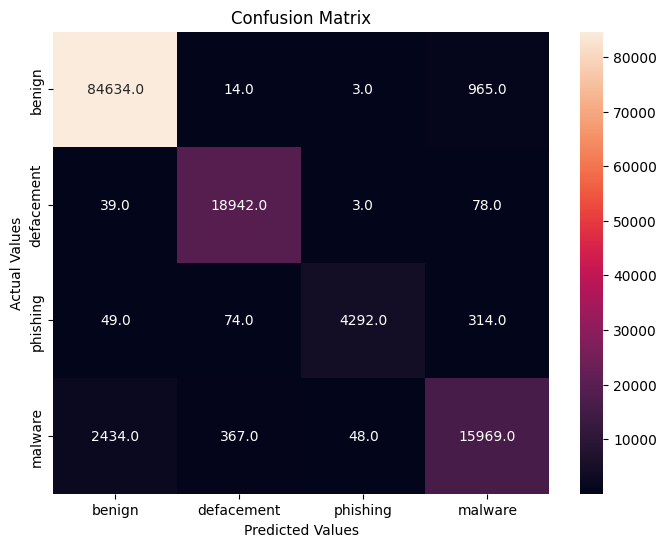

In [64]:
cm = confusion_matrix(y_test, y_pred_x)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [65]:
clf1.predict(x_test)

array([3, 0, 0, ..., 0, 0, 0])

In [66]:
from sklearn.metrics import auc, accuracy_score, classification_report, log_loss, confusion_matrix
predictions= clf1.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85616
           1       0.98      0.99      0.98     19062
           2       0.94      0.93      0.93      4729
           3       0.87      0.85      0.86     18818

    accuracy                           0.96    128225
   macro avg       0.94      0.94      0.94    128225
weighted avg       0.96      0.96      0.96    128225



Axes(0.125,0.11;0.62x0.77)


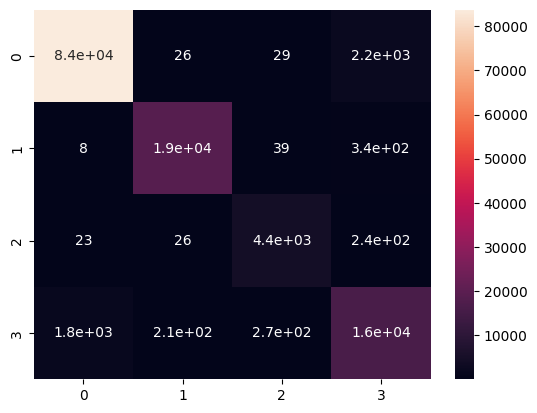

In [67]:
print(sns.heatmap(confusion_matrix(predictions, y_test),annot= True))

In [68]:
#%pip install scikit-plot

<function matplotlib.pyplot.show(close=None, block=None)>

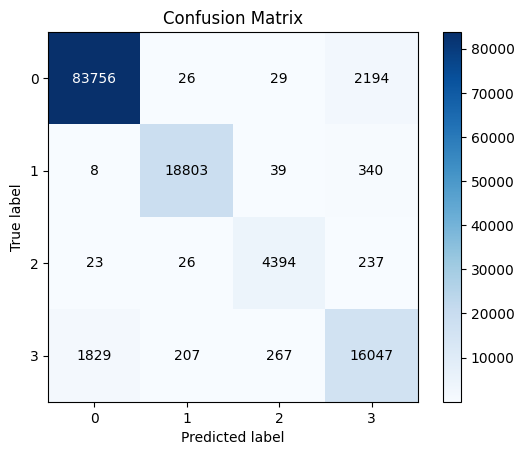

In [69]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(predictions, y_test)
plt.show


In [70]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(x_train, y_train)


y_pred_lgb = LGB_C.predict(x_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

c:\Users\AMARA NYANZI\.conda\envs\amara\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\AMARA NYANZI\.conda\envs\amara\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1660
[LightGBM] [Info] Number of data points in the train set: 512900, number of used features: 23
[LightGBM] [Info] Start training from score -0.403914
[LightGBM] [Info] Start training from score -1.906116
[LightGBM] [Info] Start training from score -3.300073
[LightGBM] [Info] Start training from score -1.918946
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85616
  defacement       0.97      0.99      0.98     19062
    phishing       0.98      0.90      0.94      4729
     malware       0.91      0.84      0.88     18818

    accuracy     

In [71]:
# # Define a simple sequential model
# def create_model():
#   model = tf.keras.Sequential([
#     keras.layers.Dense(512, activation='relu', input_shape=(784,)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10)
#   ])

#   model.compile(optimizer='adam',
#                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

#   return model

# # Create a basic model instance
# model = create_model()

# # Display the model's architecture
# model.summary()

In [72]:
#%pip install tf-nightly

In [73]:
#%pip install tflite

In [74]:
#%pip install pyyaml h5py  # Required to save models in HDF5 format

In [75]:
def main(url):
    
    status = []
    
    status.append(abnormal_url(url))
    status.append(suspicious_words(url))
    # status.append(count_http(url))
    status.append(count_https(url))
    status.append(count_www(url))
    status.append(url_length(url))
    status.append(hostname_length(url))
    
    status.append(fd_length(url))
    status.append(count_questionmark(url))
    status.append(count_forwardslash(url))
    status.append(count_percent(url))
    status.append(count_equals(url))
    
    status.append(count_hyphen(url))
    status.append(letter_count(url))
    status.append(digit_count(url))
    status.append(shortening_service(url))
    status.append(no_of_embed(url))
    status.append(having_ip_address(url))
    status.append(count_non_alphanumeric(url))
    status.append(tld_length(url))  
    status.append(count_attherate(url))  
    status.append(extract_root_domain(url))
    status.append(extract_file_type(url))
    status.append(extract_tld(url))
    
    
    # status.append(find_query(url))
    
    
    
    # 'abnormal_url', 'sus_url','count_non_alphanumeric', 'count_https','tld_alpha',
    # 'count-http', 'count-www','url_length','hostname_length','fd_length','tld_length', 
    # 'count-letters', 'query', 'short_url', 'count_embed_domian', 'use_of_ip', 'count/', 'count%', 'count=','count-', 'count@'

    # 'abnormal_url', 'sus_url','count_question','count_non_alphanumeric', 'count_https',
    # 'domain', 'count-http', 'count-www','url_length','hostname_length','fd_length', 'count-letters',
    # digits, 'short_url', 'count_embed_domian', 'use_of_ip', 'count/', 'count%', 'count=','count-', 'count@'

    return status
    

In [76]:
# class MaliciousURLs:
#     def __init__(self,xgb_c):
#         self.model = xgb_c
        # self.get_prediction_from_url(test_url)

    # def load_model(self):
    #     self.model = xgb_c

    # def main(self,url):
    
    #     status = []
        
    #     status.append(abnormal_url(url))
    #     status.append(suspicious_words(url))
    #     status.append(count_https(url))
    #     status.append(count_www(url))
    #     status.append(url_length(url))
    #     status.append(hostname_length(url))
    #     status.append(fd_length(url))
    #     status.append(count_questionmark(url))
    #     status.append(count_forwardslash(url))
    #     status.append(count_percent(url))
    #     status.append(count_equals(url))
    #     status.append(count_hyphen(url))
    #     status.append(letter_count(url))
    #     status.append(digit_count(url))
    #     status.append(shortening_service(url))
    #     status.append(no_of_embed(url))
    #     status.append(having_ip_address(url))
    #     status.append(count_non_alphanumeric(url))
    #     status.append(tld_length(url))  
    #     status.append(count_attherate(url))  
    #     status.append(extract_root_domain(url))
    #     status.append(extract_file_type(url))
    #     status.append(extract_tld(url))
    #     return status

def get_prediction_from_url( test_url):
        features_test = main(test_url)
        features_test = np.array(features_test).reshape((1, -1))

        pred = xgb_c.predict(features_test)
        if int(pred[0]) == 0:
            
            res="SAFE"
            return res
        elif int(pred[0]) == 1.0:
            
            res="DEFACEMENT"
            return res
        elif int(pred[0]) == 2.0:
            res="PHISHING"
            return res
            
        elif int(pred[0]) == 3.0:
            
            res="MALWARE"
            return res
        
# def __getitem__(self, key):
#             # return self.X[index], self.y[index]
#             return self.__dict__[key]

In [77]:
# martin=MaliciousURLs(xgb_c)
urls = ['www.google.com','https://towardsdatascience.com/extracting-feature-vectors-from-url-strings-for-malicious-url-detection-cbafc24737a','titaniumcorporate.co.za','https://egii.ro/rolu/','en.wikipedia.org/wiki/North_Dakota','https://drive.google.com/uc?export=download&id=...','https://animepahe.ru/','https://www.kaggle.com/code/anzieri/nlp-malicious-url-detection/edit','https://trudumax.ukt.co.id/ru/','https://p-g-technology.com/arvt/','https://www.kaggle.com/code/chiomaokoronkwo/phishing-prediction-using-tensorflow-and-rf']
for url in urls:
    print(get_prediction_from_url(url)) #'en.wikipedia.org/wiki/North_Dakota',

MALWARE
SAFE
MALWARE
SAFE
SAFE
SAFE
MALWARE
SAFE
SAFE
SAFE
SAFE


In [78]:
import dill as pickle
import json

# count= count_percent
data = {  "model":xgb_c,"main":main,"get_prediction": get_prediction_from_url,"urlparse": urlparse, "tldextract":tldextract, "hashlib":hashlib,
         "os":os, "re":re, "abnormal": abnormal_url, "sus_url":suspicious_words,"https":count_https,"www":count_www,"url_length":url_length,
         "host_length":hostname_length, "percent":count_percent,"fd_length":fd_length, "question":count_questionmark,
           "forwardslash":count_forwardslash, "equals":count_equals,"hyphen":count_hyphen,"letters":letter_count,
           "digits":digit_count,"short_service":shortening_service,"embedded":no_of_embed,"ip_address":having_ip_address,
           "non_alpha":count_non_alphanumeric,"tld":tld_length, "file":extract_file_type,"root_domain":extract_root_domain,
           "tld":extract_tld, "rate":count_attherate   }

with open('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/third_model.pkl', 'wb') as file:
    pickle.dump(data, file)
    

# abnormal_url,suspicious_words,count_https,count_www,url_length,hostname_length,
# "model":xgb_c, "main":main,"get_prediction": get_prediction_from_url, "abnormal": abnormal_url, "sus_url":suspicious_words,
#         "https":count_https,"www":count_www,"url_length":url_length,"host_length":hostname_length, "percent":count_percent,
#         "fd_length":fd_length, "question":count_questionmark, "forwardslash":count_forwardslash, "equals":count_equals,
#         "hyphen":count_hyphen,"letters":letter_count,"digits":digit_count,"short_service":shortening_service,
#         "embedded":no_of_embed,"ip_address":having_ip_address,"non_alpha":count_non_alphanumeric,"tld":tld_length, 
#          "file":extract_file_type,"root_domain":extract_root_domain,"tld":extract_tld, "rate":count_attherate 
# xgb_c,  get_prediction_from_url,  abnormal_url, suspicious_words,
#         count_https,count_www,url_length,hostname_length, count_percent,
#         fd_length, count_questionmark,count_forwardslash, count_equals,
#         count_hyphen,letter_count,digit_count,shortening_service, no_of_embed,having_ip_address,count_non_alphanumeric,tld_length, 
#          extract_file_type,extract_root_domain,extract_tld,count_attherate, main,
# fd_length, count_questionmark, count_forwardslash,
# import json
# with open('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/new_model.json') as model_file:
#   parsed_json = json.load(model_file) 
#   print(list(parsed_json.signatures.keys()))

In [79]:
with open('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/third_model.pkl', 'rb') as file:
    data = pickle.load(file)

    xgb_c = data["model"]
    xgb_c.predict(x_test)
    get_prediction_from_url = data["get_prediction"]
    get_prediction_from_url(url)
    urlparse=data["urlparse"]
    urlparse(url)
    tldextract=data["tldextract"]
    tldextract
    hashlib=data["hashlib"]
    hashlib
    os=data["os"]
    os
    re=data["re"]
    re
    abnormal_url = data["abnormal"]
    abnormal_url(url)
    suspicious_words = data["sus_url"]
    suspicious_words(url)
    count_https = data["https"]
    count_https(url)
    count_www = data["www"]
    count_www(url)
    url_length = data["url_length"]
    url_length(url)
    hostname_length = data["host_length"]
    hostname_length(url)
    count_percent = data["percent"]
    count_percent(url)
    fd_length = data["fd_length"]
    fd_length(url)
    count_questionmark = data["question"]
    count_questionmark(url)
    count_forwardslash = data["forwardslash"]
    count_forwardslash(url)
    count_equals = data["equals"]
    count_equals(url)
    count_hyphen = data["hyphen"]
    count_hyphen(url)
    letter_count = data["letters"]
    letter_count(url)
    digit_count = data["digits"]
    digit_count(url)
    shortening_service = data["short_service"]
    shortening_service(url)
    no_of_embed = data["embedded"]
    no_of_embed(url)
    having_ip_address = data["ip_address"]
    having_ip_address(url)
    count_non_alphanumeric = data["non_alpha"]
    count_non_alphanumeric(url)
    tld_length = data["tld"]
    tld_length(url)
    extract_file_type = data["file"]
    extract_file_type(url)
    extract_root_domain = data["root_domain"]
    extract_root_domain(url)
    extract_tld = data["tld"]
    extract_tld(url)
    count_attherate = data["rate"]
    count_attherate(url)
    main = data["main"]
    main(url)
    
# model = xgb_c
# booster = model.get_booster()
# booster.save_model('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/MAL_model.json')

In [80]:
# import tensorflow as tf
# import pickle
# import json
# import xgboost
# from tensorflow import keras
# from tensorflow.keras.models import load_model
# from tensorflow.lite.python.lite import _load

# model = xgb_c
# booster = xgboost.Booster()
# booster.load_model('booster_model.json')
# # model.load_model('xgb_model.json')

# saved_model= model.save_model(fname= 'C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/saved_model.json',signatures={'my_signature':xgb_c.add.get_concrete_function()})

# with open('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/SavedModel/saved_model.json') as model_file:
#   parsed_json = json.load(model_file) 
#   print(list(parsed_json.signatures.keys()))

# model = _load( export_dir= 'C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/saved_model.ubj' ,  tags= ['benign', 'defacement','phishing','malware'] , options= None)
# model = load_partial( 'C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/saved_model.ubj' ,  tags= ['benign', 'defacement','phishing','malware'] , options= None)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

# model = xgb_c

# model.save_model('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/saved_model.pbtxt')

# saved_model = _load('C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/saved_model.ubj', tags= ['benign', 'defacement','phishing','malware'])

# Save the model to a file
# pickle.dump(model, open("C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/MaliciousURL.pkl", "wb"))

# Load model from file
# loaded_model = pickle.load(open("C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/MaliciousURL.pkl", "rb"))

# Load the trained Keras model
# loaded_model= model.load_model(fname= "C:/Users/AMARA NYANZI/OneDrive/Desktop/Machine Learning/saved_model.ubj", tags=['benign', 'defacement','phishing','malware'])

# Create a TensorFlow Lite Converter object from the Keras model
# # converter = tf.lite.TFLiteConverter.from_saved_model(parsed_json, signature_keys=xgb_c, tags= set(['SERVING']))

# converter = tf.lite.TFLiteConverter.from_saved_model(parsed_json, signature_keys=xgb_c, tags= set(['SERVING']))

# # Convert the model to the TFLite format
# tflite_model = converter.convert()

# # Save the TFLite model to a file
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# # Load your Colab model
# model = tf.keras.models.load_model('MaliciousURL.h5')

# # Convert the model to TFLite format
# converter = tflite.TFLiteConverter.from_keras_model(clf1)
# tflite_model = converter.convert()

# # Save the TFLite model
# with open('MaliciousURL.tflite', 'wb') as f:
#   f.write(tflite_model)

NameError: name 'parsed_json' is not defined